In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set seed for reproducibility
np.random.seed(42)

%matplotlib inline

In [14]:
credit_train = pd.read_csv('Data/cs-training.csv')
print("Number of rows: %i" % credit_train.shape[0])
print("Number of columns: %i" % credit_train.shape[1])
credit_train.sample(5)

Number of rows: 150000
Number of columns: 12


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
101144,101145,0,0.069176,60,0,0.229252,11916.0,14,0,1,0,1.0
121941,121942,0,0.000000,50,0,1.219734,7144.0,13,0,4,0,1.0
50755,50756,0,0.328569,66,0,0.601431,7265.0,27,0,2,0,0.0
121395,121396,0,1.000000,39,0,0.031716,4224.0,1,0,0,0,3.0
132825,132826,0,0.001040,63,0,11.000000,NaN,7,0,0,0,0.0


In [6]:
credit_test = pd.read_csv('Data/cs-test.csv')
print("Number of rows: %i" % credit_test.shape[0])
print("Number of columns: %i" % credit_test.shape[1])
credit_test.head()

Number of rows: 101503
Number of columns: 12


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [4]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [7]:
credit_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [8]:
# Copy original datasets so that we have them in case we make changes to them
credit_train_original = credit_train.copy()
credit_test_original = credit_test.copy()

In [15]:
# Unnamed: 0 is an id. No use for analysis. CAN BE DROPPED - train
credit_train = credit_train.drop('Unnamed: 0', axis=1)
credit_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [16]:
# Unnamed: 0 is an id. No use for analysis. CAN BE DROPPED - test
credit_test.drop('Unnamed: 0', axis=1, inplace=True)
credit_test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [21]:
credit_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


#### MISSING VALUES : MonthlyIncome and NumberOfDependents. Need to deal with them

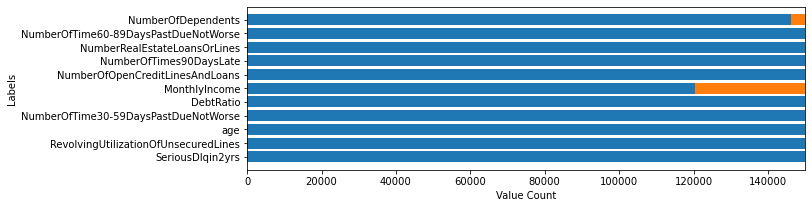

In [26]:
# Lets see them in a graph

cols = credit_train.columns
nullcounts = []
value_counts = []
for col in cols:
    nullcounts.append(credit_train[col].isnull().sum())
    value_counts.append(credit_train[col].shape[0] - credit_train[col].isnull().sum())

fig, ax = plt.subplots(figsize=(10,3))
ax.barh(cols, value_counts, label='not missing')
ax.barh(cols, nullcounts, label='missing', left=value_counts)
ax.set_xlabel('Value Count')
ax.set_ylabel('Labels')
plt.show()

In [18]:
# NUMBER OF DEPENDENTS
# number of missing

credit_train['NumberOfDependents'].isnull().sum()

3924

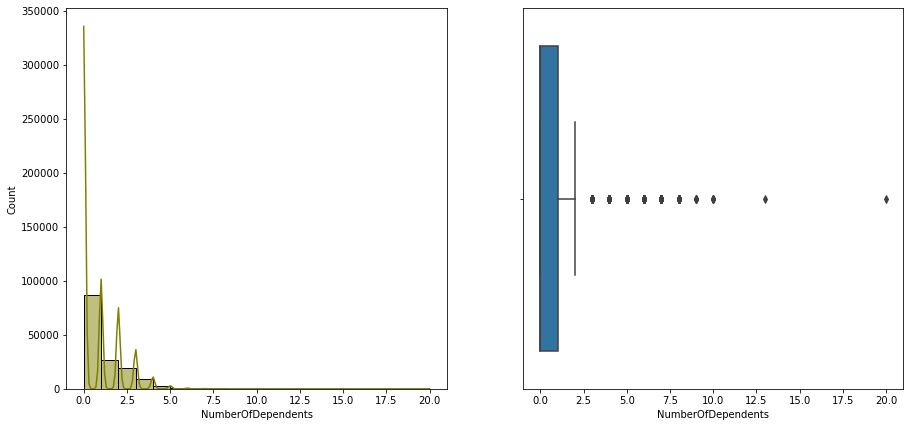

In [19]:
f, axes = plt.subplots(nrows=1,
                       ncols=2, 
                       figsize=(15,7))
sns.histplot(data=credit_train['NumberOfDependents'], color="olive", ax=axes[0], bins=20, kde=True);
sns.boxplot(data=credit_train, ax=axes[1], x='NumberOfDependents');

In [22]:
credit_train['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [ ]:
# We will fill the missing number of dependents with 0:
# 1/ it is the median
# 2/ we will assume it is not filled in because the borrower has no dependents
# We will change it to integer, as per the data dictionary, after filling in the missing values

In [ ]:
# MONTHLY INCOME
# Number of missings

In [24]:
credit_train['MonthlyIncome'].isnull().sum()

29731

In [28]:
# According to the data dictionary, the 'DebtRatio' is 'Monthly debt payments, alimony,living costs divided
# by monthly gross income' - what are the values for this field when income is missing, 0, 1

credit_train[credit_train['MonthlyIncome'] < 100]['MonthlyIncome'].value_counts()

0.0     1634
1.0      605
2.0        6
50.0       4
40.0       3
27.0       2
5.0        2
70.0       2
4.0        2
10.0       2
69.0       1
83.0       1
21.0       1
55.0       1
25.0       1
72.0       1
56.0       1
42.0       1
84.0       1
7.0        1
9.0        1
11.0       1
34.0       1
15.0       1
75.0       1
Name: MonthlyIncome, dtype: int64

In [29]:
credit_train[credit_train['MonthlyIncome'] < 100]['DebtRatio'].describe()

count     2277.000000
mean      1384.768285
std       2763.802927
min          0.000000
25%         89.000000
50%        752.000000
75%       1865.000000
max      61106.500000
Name: DebtRatio, dtype: float64

In [30]:
credit_train['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [33]:
credit_train[credit_train['MonthlyIncome'] <= 1]['DebtRatio'].describe()

count     2239.000000
mean      1406.769540
std       2781.919015
min          0.000000
25%         98.000000
50%        779.500000
75%       1883.500000
max      61106.500000
Name: DebtRatio, dtype: float64

In [34]:
credit_train[credit_train['MonthlyIncome'].isnull()]['DebtRatio'].describe()

count     29731.000000
mean       1673.396556
std        4248.372895
min           0.000000
25%         123.000000
50%        1159.000000
75%        2382.000000
max      329664.000000
Name: DebtRatio, dtype: float64

C:\Users\Quique\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Quique\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Quique\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (

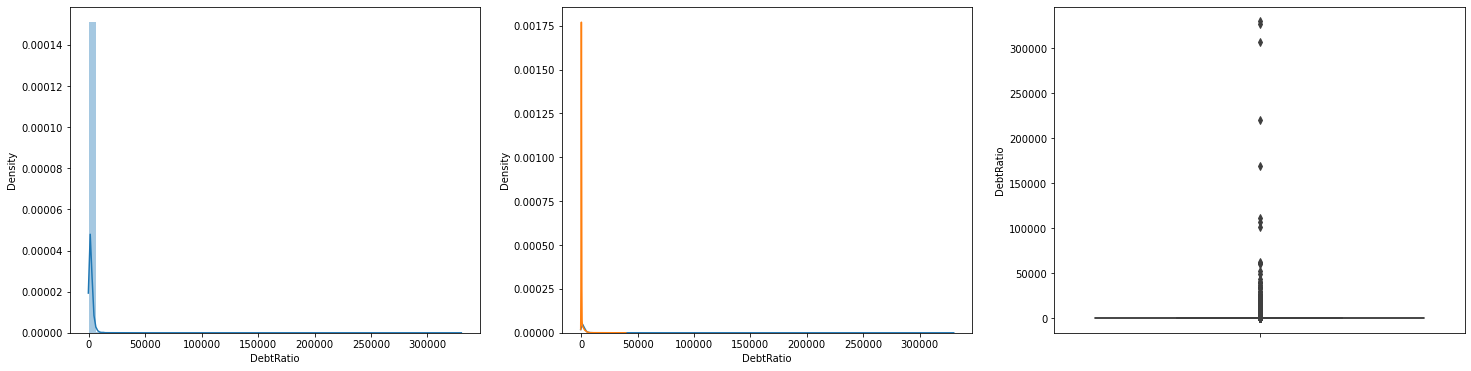

In [38]:
fig,[ax1,ax2,ax3]=plt.subplots(1,3,figsize=(25,6))
sns.distplot(credit_train['DebtRatio'],ax=ax1)

target_0 = credit_train.loc[credit_train['SeriousDlqin2yrs'] == 0]
target_1 = credit_train.loc[credit_train['SeriousDlqin2yrs'] == 1]

sns.distplot(target_0[['DebtRatio']], hist=False ,ax=ax2, label='No default', axlabel='DebtRatio')
sns.distplot(target_1[['DebtRatio']], hist=False ,ax=ax2, label='Default')

sns.boxplot(y='DebtRatio',data=credit_train,ax=ax3);


In [39]:
# DebtRatio max is incredibly high as per definition of ratio. We are talking about individuals.
# Let's check when it changes

for i in range(80, 100, 1):
    print('Quantile ', i, ': ', credit_train.DebtRatio.quantile(i/100))

Quantile  80 :  4.0
Quantile  81 :  14.0
Quantile  82 :  31.0
Quantile  83 :  61.0
Quantile  84 :  121.0
Quantile  85 :  269.1499999999942
Quantile  86 :  453.0
Quantile  87 :  635.0
Quantile  88 :  846.0
Quantile  89 :  1056.0
Quantile  90 :  1267.0
Quantile  91 :  1462.0
Quantile  92 :  1685.0
Quantile  93 :  1917.070000000007
Quantile  94 :  2172.0599999999977
Quantile  95 :  2449.0
Quantile  96 :  2791.0
Quantile  97 :  3225.0
Quantile  98 :  3839.0
Quantile  99 :  4979.040000000037


In [40]:
# Let's look into the records with Debt ratio > quantile 90 (approx. 10% of the records remaining)
credit_train[(credit_train['DebtRatio'] > 1267)]['DebtRatio'].count()

14995

In [41]:
# Let's check those records re: Monthly Income, and our target variable SeriousDlqin2yrs
credit_train[(credit_train['DebtRatio'] > 1267)][['MonthlyIncome', 'SeriousDlqin2yrs']].describe()

,MonthlyIncome,SeriousDlqin2yrs
count,849.000000,14995.000000
mean,0.195524,0.049817
std,0.396837,0.217573
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [42]:
credit_train[(credit_train['DebtRatio'] > 1267)]['SeriousDlqin2yrs'].value_counts(normalize=True)

0    0.950183
1    0.049817
Name: SeriousDlqin2yrs, dtype: float64

In [ ]:
#### We see that out of the 14995 records with Debt ratio > 1267:
# - only 849 have an actual value in Monthly Income
# - of those with an actual value in Monthly Income, this is either 0 or 1
# Also, despite owing > 1267 times their monthly gross income, these individuals aren't defaulting any more than the general
# population (in fact, less). We can conclude that these entries must be data-entry errors, so we will remove them from our model

In [44]:
# Revolving Utilization Of Unsecured Lines.
# Defined as "Total balance on credit cards and personal lines of credit except real estate and no 
# installment debt like car loans divided by the sum of credit limits". Percentage.

credit_train['RevolvingUtilizationOfUnsecuredLines'].describe().apply("{0:.2f}".format)

count    150000.00
mean          6.05
std         249.76
min           0.00
25%           0.03
50%           0.15
75%           0.56
max       50708.00
Name: RevolvingUtilizationOfUnsecuredLines, dtype: object

In [46]:
# Again, we find that max is incredibly high as per the definition of this ratio.
# Let's check when and how it changes

for i in range(90, 101, 1):
    print('Quantile ', i, ': ', credit_train.RevolvingUtilizationOfUnsecuredLines.quantile(i/100))

Quantile  90 :  0.9812777179
Quantile  91 :  0.9999998999999999
Quantile  92 :  0.9999998999999999
Quantile  93 :  0.9999998999999999
Quantile  94 :  0.9999998999999999
Quantile  95 :  0.9999998999999999
Quantile  96 :  0.9999998999999999
Quantile  97 :  0.9999998999999999
Quantile  98 :  1.00619877654
Quantile  99 :  1.092955768140002
Quantile  100 :  50708.0


In [47]:
# As per above, we can see reasonable ratios up to quantile 99
# Let's study those records with ratios above quantile 99 against the target variable.
# Outlier values appear to be way too high
# Default rates compared with the rest of the population

print(credit_train[credit_train['RevolvingUtilizationOfUnsecuredLines'] <= 1.1].SeriousDlqin2yrs.value_counts(normalize=True))
print()
print(credit_train[credit_train['RevolvingUtilizationOfUnsecuredLines'] > 1.1].SeriousDlqin2yrs.value_counts(normalize=True))

0    0.93631
1    0.06369
Name: SeriousDlqin2yrs, dtype: float64

0    0.610882
1    0.389118
Name: SeriousDlqin2yrs, dtype: float64


In [50]:
# Outliers (> 1.1) appear to be defaulting more than the overall population, which makes sense. Is this consistent?
for i in range(1, 21, 1):
    print('Threshold ', i, '- Default rate: ', 
        credit_train[credit_train['RevolvingUtilizationOfUnsecuredLines'] >= i].SeriousDlqin2yrs.value_counts(normalize=True)[1])

Threshold  1 - Default rate:  0.37177950868783705
Threshold  2 - Default rate:  0.14555256064690028
Threshold  3 - Default rate:  0.09931506849315068
Threshold  4 - Default rate:  0.08679245283018867
Threshold  5 - Default rate:  0.07874015748031496
Threshold  6 - Default rate:  0.07692307692307693
Threshold  7 - Default rate:  0.0778688524590164
Threshold  8 - Default rate:  0.07407407407407407
Threshold  9 - Default rate:  0.07053941908713693
Threshold  10 - Default rate:  0.07053941908713693
Threshold  11 - Default rate:  0.07053941908713693
Threshold  12 - Default rate:  0.06666666666666667
Threshold  13 - Default rate:  0.058823529411764705
Threshold  14 - Default rate:  0.058823529411764705
Threshold  15 - Default rate:  0.05531914893617021
Threshold  16 - Default rate:  0.05531914893617021
Threshold  17 - Default rate:  0.05531914893617021
Threshold  18 - Default rate:  0.05531914893617021
Threshold  19 - Default rate:  0.05555555555555555
Threshold  20 - Default rate:  0.055555

In [51]:
# Default rates are not consistent and do not appear to make sense: the worse the ratio (more money owed), the less 
# the default rate
# I will remove those records (Threshold  4)
credit_train[credit_train['RevolvingUtilizationOfUnsecuredLines'] >= 4]['RevolvingUtilizationOfUnsecuredLines'].count()

265

In [52]:
# UNIVARIATE ANALYSIS
# NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines
credit_train[['NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines']].describe()

,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines
count,150000.000000,150000.000000
mean,8.452760,1.018240
std,5.145951,1.129771
min,0.000000,0.000000
25%,5.000000,0.000000
50%,8.000000,1.000000
75%,11.000000,2.000000
max,58.000000,54.000000


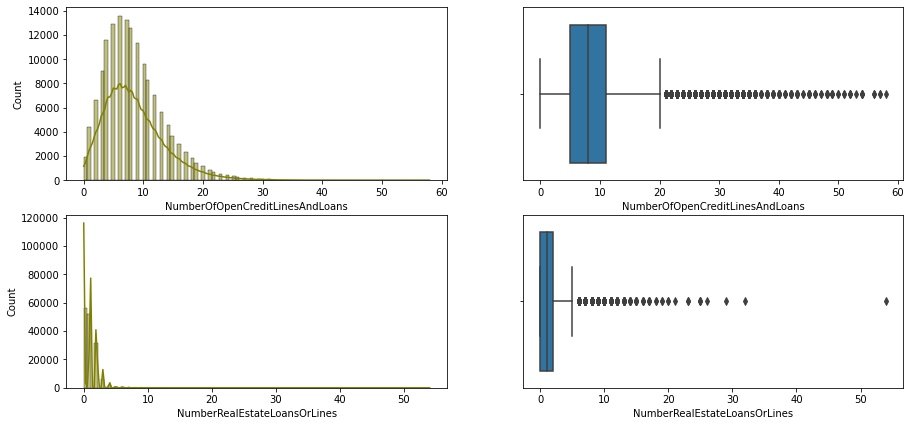

In [53]:
f, axes = plt.subplots(nrows=2,
                       ncols=2, 
                       figsize=(15,7))
sns.histplot(data=credit_train['NumberOfOpenCreditLinesAndLoans'], color="olive", ax=axes[0, 0], bins=100, kde=True);
sns.boxplot(data=credit_train, ax=axes[0, 1], x='NumberOfOpenCreditLinesAndLoans');

sns.histplot(data=credit_train['NumberRealEstateLoansOrLines'], color="olive", ax=axes[1, 0], bins=100, kde=True);
sns.boxplot(data=credit_train, ax=axes[1, 1], x='NumberRealEstateLoansOrLines');

In [63]:
# Look into outliers
credit_train[credit_train['NumberOfOpenCreditLinesAndLoans'] >= 30]['NumberOfOpenCreditLinesAndLoans'].value_counts()

30    88
31    74
32    52
33    47
34    35
35    27
36    18
38    13
40    10
39     9
45     8
42     8
43     8
37     7
48     6
41     4
49     4
54     4
46     3
52     3
44     2
57     2
47     2
50     2
51     2
56     2
53     1
58     1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

In [57]:
credit_train[credit_train['NumberOfOpenCreditLinesAndLoans'] >= 50]['SeriousDlqin2yrs'].value_counts(normalize=True)

0    0.882353
1    0.117647
Name: SeriousDlqin2yrs, dtype: float64

In [59]:
# Look into outliers
credit_train[credit_train['NumberRealEstateLoansOrLines'] >= 20]['NumberRealEstateLoansOrLines'].value_counts()

25    3
23    2
20    2
29    1
26    1
54    1
21    1
32    1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [60]:
credit_train[credit_train['NumberRealEstateLoansOrLines'] >= 25]['SeriousDlqin2yrs'].value_counts(normalize=True)

0    0.714286
1    0.285714
Name: SeriousDlqin2yrs, dtype: float64

In [ ]:
# I will not drop any outliers for now as they appear to add consistent information on the target variable. Candidates 
# for dropping: NumberRealEstateLoansOrLines >=20. NumberOfOpenCreditLinesAndLoans >=30

In [ ]:
# Past due fields: NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate.
# - NumberOfTime30-59DaysPastDueNotWorse: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
# - NumberOfTime60-89DaysPastDueNotWorse: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
# - NumberOfTimes90DaysLate: Number of times borrower has been 90 days or more past due.

In [64]:
credit_train['NumberOfTime30-59DaysPastDueNotWorse'].describe()

count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

In [65]:
credit_train['NumberOfTime60-89DaysPastDueNotWorse'].describe()

count    150000.000000
mean          0.240387
std           4.155179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

In [66]:
credit_train['NumberOfTimes90DaysLate'].describe()

count    150000.000000
mean          0.265973
std           4.169304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

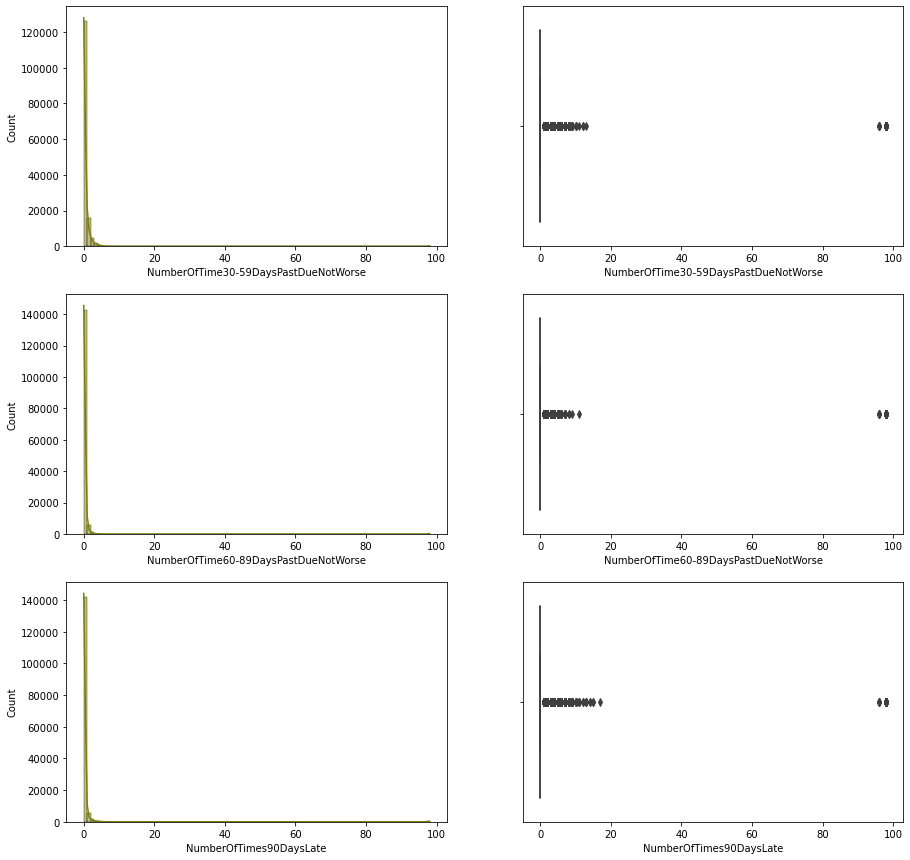

In [67]:
f, axes = plt.subplots(nrows=3,
                       ncols=2, 
                       figsize=(15,15))
sns.histplot(data=credit_train['NumberOfTime30-59DaysPastDueNotWorse'], color="olive", ax=axes[0, 0], bins=100, kde=True);
sns.boxplot(data=credit_train, ax=axes[0, 1], x='NumberOfTime30-59DaysPastDueNotWorse');

sns.histplot(data=credit_train['NumberOfTime60-89DaysPastDueNotWorse'], color="olive", ax=axes[1, 0], bins=100, kde=True);
sns.boxplot(data=credit_train, ax=axes[1, 1], x='NumberOfTime60-89DaysPastDueNotWorse');

sns.histplot(data=credit_train['NumberOfTimes90DaysLate'], color="olive", ax=axes[2, 0], bins=100, kde=True);
sns.boxplot(data=credit_train, ax=axes[2, 1], x='NumberOfTimes90DaysLate');

In [68]:
# Look into outliers
credit_train[credit_train['NumberOfTime30-59DaysPastDueNotWorse'] > 80]['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

98    264
96      5
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [69]:
# Look into outliers
credit_train[credit_train['NumberOfTime60-89DaysPastDueNotWorse'] > 80]['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

98    264
96      5
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [70]:
# Look into outliers
credit_train[credit_train['NumberOfTimes90DaysLate'] > 80]['NumberOfTimes90DaysLate'].value_counts()

98    264
96      5
Name: NumberOfTimes90DaysLate, dtype: int64

In [76]:
# Look into outliers - All in the same records for these fields
credit_train[(credit_train['NumberOfTimes90DaysLate'] > 80) & (credit_train['NumberOfTime60-89DaysPastDueNotWorse'] > 80)
             & (credit_train['NumberOfTime30-59DaysPastDueNotWorse'] > 80)]['NumberOfTimes90DaysLate'].value_counts()

98    264
96      5
Name: NumberOfTimes90DaysLate, dtype: int64

In [77]:
# Look into outliers - These values appear to add a lot of info on defaulting
credit_train[(credit_train['NumberOfTimes90DaysLate'] > 80) & (credit_train['NumberOfTime60-89DaysPastDueNotWorse'] > 80)
             & (credit_train['NumberOfTime30-59DaysPastDueNotWorse'] > 80)]['SeriousDlqin2yrs'].value_counts(normalize=True)

1    0.546468
0    0.453532
Name: SeriousDlqin2yrs, dtype: float64

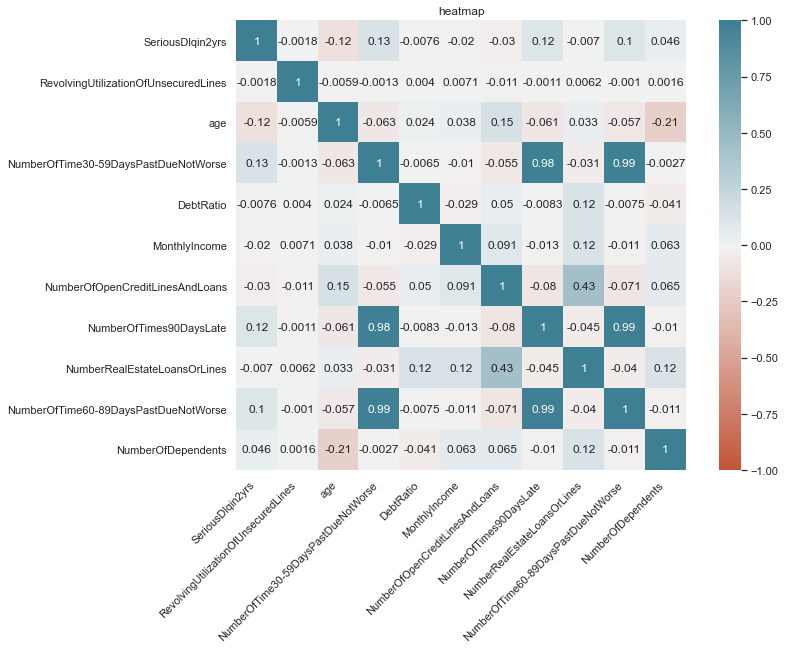

In [85]:
corr_matrix=credit_train.corr()

ax = sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt=".2g", square=True)
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=45,
horizontalalignment='right'
);
plt.title("heatmap");

In [95]:
def most_correlated_pairs(dataframe, threshold=0.10):
    corr_matrix = dataframe.corr()
    indexes = corr_matrix.columns
    pair_names = []
    values = []
    abs_values = []
    for row_index in indexes:
        for col_index in indexes:
            if str(row_index) != str(col_index):
                pair_name = f'{row_index} v/s {col_index}'
                alt_pair_name = f'{col_index} v/s {row_index}'
                if (pair_name not in pair_names) and (alt_pair_name not in pair_names):
                    pair_names.append(pair_name)
                    values.append(corr_matrix[row_index][col_index])
                    abs_values.append(abs(corr_matrix[row_index][col_index]))

    correlation_pairs = pd.DataFrame({
        'pair_name': pair_names,
        'value': values,
        'abs_value': abs_values
    }).sort_values(by='abs_value', ascending=False).reset_index(drop=True)
    return correlation_pairs[correlation_pairs.abs_value >= threshold]

most_correlated_pairs(credit_train)

,pair_name,value,abs_value
0,NumberOfTimes90DaysLate v/s NumberOfTime60-89D...,0.992796,0.992796
1,NumberOfTime30-59DaysPastDueNotWorse v/s Numbe...,0.987005,0.987005
2,NumberOfTime30-59DaysPastDueNotWorse v/s Numbe...,0.983603,0.983603
3,NumberOfOpenCreditLinesAndLoans v/s NumberReal...,0.433959,0.433959
4,age v/s NumberOfDependents,-0.213303,0.213303
5,age v/s NumberOfOpenCreditLinesAndLoans,0.147705,0.147705
6,SeriousDlqin2yrs v/s NumberOfTime30-59DaysPast...,0.125587,0.125587
7,MonthlyIncome v/s NumberRealEstateLoansOrLines,0.124959,0.124959
8,NumberRealEstateLoansOrLines v/s NumberOfDepen...,0.124684,0.124684
9,DebtRatio v/s NumberRealEstateLoansOrLines,0.120046,0.120046


In [96]:
def correlated_tree(dataframe, threshold=0.05):
    corr_matrix = dataframe.corr()
    indexes = corr_matrix.columns
    nodes = {}
    for row_index in indexes:
        for col_index in indexes:
            value = corr_matrix[row_index][col_index]
            if (str(row_index) != str(col_index)) and (threshold < value):
                value_as_str = f'{col_index} ({str(abs(round(value, 3)))})'
                if row_index not in nodes:
                    nodes[row_index] = []

                nodes[row_index].append(value_as_str)
    
    return dict(sorted(nodes.items(), key=lambda item: item[0]))

credit_train_tree = correlated_tree(credit_train, threshold=0.07)
for each_node in credit_train_tree:
    print(each_node)
    for each in credit_train_tree[each_node]:
        print(f'└─ {each }')
    print()

DebtRatio
└─ NumberRealEstateLoansOrLines (0.12)

MonthlyIncome
└─ NumberOfOpenCreditLinesAndLoans (0.091)
└─ NumberRealEstateLoansOrLines (0.125)

NumberOfDependents
└─ NumberRealEstateLoansOrLines (0.125)

NumberOfOpenCreditLinesAndLoans
└─ age (0.148)
└─ MonthlyIncome (0.091)
└─ NumberRealEstateLoansOrLines (0.434)

NumberOfTime30-59DaysPastDueNotWorse
└─ SeriousDlqin2yrs (0.126)
└─ NumberOfTimes90DaysLate (0.984)
└─ NumberOfTime60-89DaysPastDueNotWorse (0.987)

NumberOfTime60-89DaysPastDueNotWorse
└─ SeriousDlqin2yrs (0.102)
└─ NumberOfTime30-59DaysPastDueNotWorse (0.987)
└─ NumberOfTimes90DaysLate (0.993)

NumberOfTimes90DaysLate
└─ SeriousDlqin2yrs (0.117)
└─ NumberOfTime30-59DaysPastDueNotWorse (0.984)
└─ NumberOfTime60-89DaysPastDueNotWorse (0.993)

NumberRealEstateLoansOrLines
└─ DebtRatio (0.12)
└─ MonthlyIncome (0.125)
└─ NumberOfOpenCreditLinesAndLoans (0.434)
└─ NumberOfDependents (0.125)

SeriousDlqin2yrs
└─ NumberOfTime30-59DaysPastDueNotWorse (0.126)
└─ NumberOfTimes90D

In [102]:
# Prepare for VIF: need to remove NaN
# One value of Age=0. Potential entry error. Will change to median age.
credit_train.loc[credit_train['age'] == 0, 'age'] = credit_train.age.median()

In [103]:
credit_train['NumberOfDependents'].fillna(0, inplace=True)

In [105]:
credit_train[credit_train['RevolvingUtilizationOfUnsecuredLines'] >= 4]['RevolvingUtilizationOfUnsecuredLines'].count()

265

In [106]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

In [107]:
credit_train = credit_train[credit_train['RevolvingUtilizationOfUnsecuredLines'] < 4]

In [108]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149735 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149735 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149735 non-null  float64
 2   age                                   149735 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  149735 non-null  int64  
 4   DebtRatio                             149735 non-null  float64
 5   MonthlyIncome                         120082 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149735 non-null  int64  
 7   NumberOfTimes90DaysLate               149735 non-null  int64  
 8   NumberRealEstateLoansOrLines          149735 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149735 non-null  int64  
 10  NumberOfDependents                    149735 non-null  float64
dtype

In [110]:
credit_train[(credit_train['DebtRatio'] > 1267)]['DebtRatio'].count()

14951

In [111]:
credit_train = credit_train[(credit_train['DebtRatio'] <= 1267)]

In [112]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134784 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      134784 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  134784 non-null  float64
 2   age                                   134784 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  134784 non-null  int64  
 4   DebtRatio                             134784 non-null  float64
 5   MonthlyIncome                         119234 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       134784 non-null  int64  
 7   NumberOfTimes90DaysLate               134784 non-null  int64  
 8   NumberRealEstateLoansOrLines          134784 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  134784 non-null  int64  
 10  NumberOfDependents                    134784 non-null  float64
dtype

In [131]:
def categorizeAge(age):
    if (age < 30):
        return '-30'
    elif (age >= 30) & (age < 40):
        return'30-40'
    elif (age >= 40) & (age < 50):
        return'40-50'
    elif (age >= 50) & (age < 60):
        return'50-60'
    elif (age >= 60) & (age < 70):
        return'60-70'
    elif (age >= 70) & (age < 80):
        return'70-80'
    elif (age >= 80) & (age < 90):
        return'80-90'
    else:
        return '90-'
    
imputedf = credit_train.copy()
imputedf['Age_int'] = imputedf['age'].apply(categorizeAge)
income_dict = imputedf.groupby('Age_int')['MonthlyIncome'].mean().to_dict()
for k, v in income_dict.items(): 
        imputedf["MonthlyIncome"] = np.where((imputedf["MonthlyIncome"].isnull()) & (imputedf['Age_int'] == k),
                                             v, imputedf["MonthlyIncome"])

credit_train['MonthlyIncome'] = imputedf['MonthlyIncome']

In [132]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134784 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      134784 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  134784 non-null  float64
 2   age                                   134784 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  134784 non-null  int64  
 4   DebtRatio                             134784 non-null  float64
 5   MonthlyIncome                         134784 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       134784 non-null  int64  
 7   NumberOfTimes90DaysLate               134784 non-null  int64  
 8   NumberRealEstateLoansOrLines          134784 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  134784 non-null  int64  
 10  NumberOfDependents                    134784 non-null  float64
dtype

In [142]:
# Past due variables very correlated among them, but not to target variable. Check multicollinearity - VIF (Variance Inflation
# Factor)
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

test = credit_train.iloc[:, 1:]
test['CombinedDue'] = np.where((credit_train['NumberOfTime30-59DaysPastDueNotWorse'] > 0) |
                               (credit_train['NumberOfTimes90DaysLate'] > 0) |
                               (credit_train['NumberOfTime60-89DaysPastDueNotWorse'] > 0), 1, 0)
#test['CombinedDue'].sum()
#credit_train[(credit_train['NumberOfTime30-59DaysPastDueNotWorse'] > 0) |
#                               (credit_train['NumberOfTimes90DaysLate'] > 0) |
#                               (credit_train['NumberOfTime60-89DaysPastDueNotWorse'] > 0)]
calc_vif(test) # All columns but the target column

,variables,VIF
0,RevolvingUtilizationOfUnsecuredLines,1.847000
1,age,4.054221
2,NumberOfTime30-59DaysPastDueNotWorse,62.722395
3,DebtRatio,1.074833
4,MonthlyIncome,1.265122
5,NumberOfOpenCreditLinesAndLoans,4.526599
6,NumberOfTimes90DaysLate,79.591742
7,NumberRealEstateLoansOrLines,2.218360
8,NumberOfTime60-89DaysPastDueNotWorse,115.581880
9,NumberOfDependents,1.495740


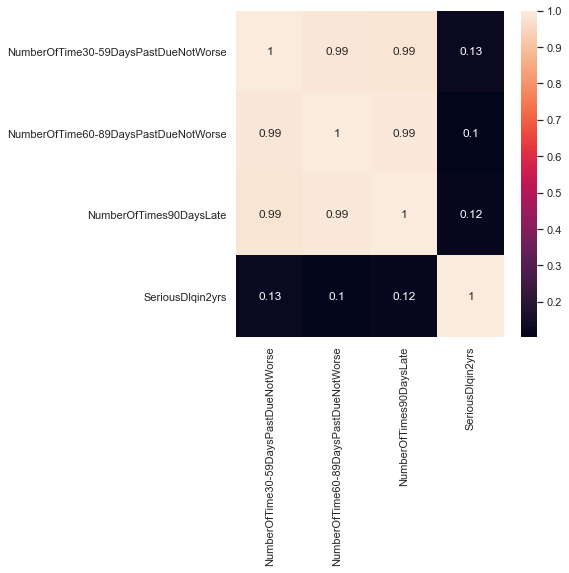

In [143]:
# Lets find correlation among these variables
cr_due1 = credit_train[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', \
                        'NumberOfTimes90DaysLate', 'SeriousDlqin2yrs']]

corr = cr_due1.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, fmt=".2g");

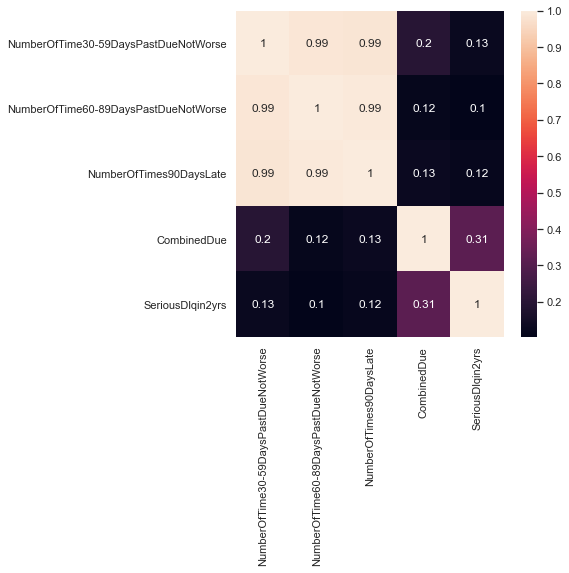

In [147]:
credit_train['CombinedDue'] = test['CombinedDue']

cr_due2 = credit_train[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', \
                        'NumberOfTimes90DaysLate', 'CombinedDue', 'SeriousDlqin2yrs']]

corr = cr_due2.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, fmt=".2g");

In [149]:
test.drop('NumberOfTime60-89DaysPastDueNotWorse', axis=1, inplace=True)
test.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents', 'CombinedDue'],
      dtype='object')

In [150]:
calc_vif(test)

,variables,VIF
0,RevolvingUtilizationOfUnsecuredLines,1.844154
1,age,4.053515
2,NumberOfTime30-59DaysPastDueNotWorse,41.684561
3,DebtRatio,1.074794
4,MonthlyIncome,1.265116
5,NumberOfOpenCreditLinesAndLoans,4.526581
6,NumberOfTimes90DaysLate,40.681612
7,NumberRealEstateLoansOrLines,2.218314
8,NumberOfDependents,1.495737
9,CombinedDue,1.704010


In [151]:
test.drop('NumberOfTime30-59DaysPastDueNotWorse', axis=1, inplace=True)
test.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents', 'CombinedDue'],
      dtype='object')

In [152]:
calc_vif(test)

,variables,VIF
0,RevolvingUtilizationOfUnsecuredLines,1.833598
1,age,4.041410
2,DebtRatio,1.074561
3,MonthlyIncome,1.265108
4,NumberOfOpenCreditLinesAndLoans,4.491482
5,NumberOfTimes90DaysLate,1.031976
6,NumberRealEstateLoansOrLines,2.216434
7,NumberOfDependents,1.495610
8,CombinedDue,1.428909


#### RE-START PROCESS BASED ON ALL THE INFORMATION ABOVE

In [248]:
credit_train = pd.read_csv('Data/cs-training.csv')
print("Number of rows: %i" % credit_train.shape[0])
print("Number of columns: %i" % credit_train.shape[1])

Number of rows: 150000
Number of columns: 12


In [249]:
credit_test = pd.read_csv('Data/cs-test.csv')
print("Number of rows: %i" % credit_test.shape[0])
print("Number of columns: %i" % credit_test.shape[1])

Number of rows: 101503
Number of columns: 12


In [247]:
# TRAIN AND TEST DATASET PREPROCESSING FUNCTIONS
def categorizeAge(age):
    if (age < 30):
        return '-30'
    elif (age >= 30) & (age < 40):
        return'30-40'
    elif (age >= 40) & (age < 50):
        return'40-50'
    elif (age >= 50) & (age < 60):
        return'50-60'
    elif (age >= 60) & (age < 70):
        return'60-70'
    elif (age >= 70) & (age < 80):
        return'70-80'
    elif (age >= 80) & (age < 90):
        return'80-90'
    else:
        return '90-'
    
######################################################################

def data_pre_process(df,  # Actual dataset name
                   split,  # Train or test
                   age_lower_limit=None, age_upper_limit=None, # To remove outliers in age
                   debt_ratio_threshold=None, # To remove outliers in DebtRatio
                   revol_util_threshold=None, # To remove outliers in RevolvingUtilizationOfUnsecuredLines
                   num_late_threshold=None,  # Can be used to remove outliers 96, 98
                   create_combined_late_and_remove=False, # To create CombinedDue column and remove 30-59 and 60-89 columns (VIF)
                   num_real_estate_threshold=None, # To remove outliers in NumberRealEstateLoansOrLines
                   num_open_credit_threshold=None, # To remove outliers in NumberOfOpenCreditLinesAndLoans
                   num_depend_miss=0,
                   month_income_miss='mean',  # 'mean' or 'median'
                   create_income_miss_col=False # To create a dummie column with 1 in the Income rows missing and imputed
                   ):
    
    df.drop('Unnamed: 0',axis = 1,inplace=True)
    
    # Impute value of Age=0. Potential entry error. Will impute median age.
    df.loc[df['age'] == 0, 'age'] = df.age.median()
    
    assert split in ['train','test'], 'split must be train or test'
    
    if split=='train':
        # Filter age
        if age_lower_limit != None:
            df = df[df['age']>age_lower_limit]
        if age_upper_limit != None:
            df = df[df['age']<age_upper_limit]

        # Filter DebtRatio
        if debt_ratio_threshold != None:
            df = df[df['DebtRatio']<=debt_ratio_threshold]
    
        # Filter RevolvingUtilizationOfUnsecuredLines
        if revol_util_threshold != None:
            df = df[df['RevolvingUtilizationOfUnsecuredLines']<=revol_util_threshold]

        # Filter NumberOfTimes##DaysLate
        if num_late_threshold != None:
            df = df[df['NumberOfTime30-59DaysPastDueNotWorse']<=num_late_threshold]
            df = df[df['NumberOfTime60-89DaysPastDueNotWorse']<=num_late_threshold]
            df = df[df['NumberOfTimes90DaysLate']<=num_late_threshold]
        
        # Filter NumberRealEstateLoansOrLines
        if num_real_estate_threshold != None:
            df = df[df['NumberRealEstateLoansOrLines']<num_real_estate_threshold]

        # Filter NumberRealEstateLoansOrLines
        if num_open_credit_threshold != None:
            df = df[df['NumberOfOpenCreditLinesAndLoans']<num_open_credit_threshold]
            
        df.reset_index(inplace=True, drop=True)
        
    ##### Creating / Removing Past Due columns - FOR BOTH TRAIN AND TEST #####
        
    # Create new 'combined due' column and remove 30-59 and 60-89 columns (as per VIF)
    if create_combined_late_and_remove:
        df['CombinedDue'] = np.where((df['NumberOfTime30-59DaysPastDueNotWorse'] > 0) |
                                     (df['NumberOfTimes90DaysLate'] > 0) |
                                     (df['NumberOfTime60-89DaysPastDueNotWorse'] > 0), 1, 0)
        df.drop('NumberOfTime30-59DaysPastDueNotWorse', axis=1, inplace=True)
        df.drop('NumberOfTime60-89DaysPastDueNotWorse', axis=1, inplace=True)

    ##### Handling missing values - FOR BOTH TRAIN AND TEST #####
    
    # Fill NumberOfDependents missing values with 0, which is the mode
    df.loc[df['NumberOfDependents'].isnull(),'NumberOfDependents'] = num_depend_miss
    
    assert month_income_miss in ['mean','median'], 'Monthly income must be filled with median or mean'
    
    # Create a dummie column with 1 in the Income rows missing and imputed
    if create_income_miss_col:
        df['income_was_missing'] = df['MonthlyIncome'].isnull()
    
    # Fill MonthlyIncome missing values
    imputedf = df.copy()
    imputedf['Age_int'] = imputedf['age'].apply(categorizeAge)
    
    if month_income_miss == 'mean':
        income_dict = imputedf.groupby('Age_int')['MonthlyIncome'].mean().to_dict()
    else:
        income_dict = imputedf.groupby('Age_int')['MonthlyIncome'].median().to_dict()
        
    for k, v in income_dict.items(): 
        imputedf["MonthlyIncome"] = np.where((imputedf["MonthlyIncome"].isnull()) & (imputedf['Age_int'] == k),
                                             v, imputedf["MonthlyIncome"])

    df['MonthlyIncome'] = imputedf['MonthlyIncome']
        
    return df

In [250]:
train_df = data_pre_process(credit_train,
                           split='train',
                           debt_ratio_threshold=1267,
                           revol_util_threshold=10,
                           create_combined_late_and_remove=True,
                           num_depend_miss=0,
                           month_income_miss='mean',
                           create_income_miss_col=True
                           )
test_df  = data_pre_process(credit_test,
                            split='test',
                            create_combined_late_and_remove=True,
                            create_income_miss_col=True
                           )

In [257]:
print("Number of rows: %i" % test_df.shape[0])
print("Number of columns: %i" % test_df.shape[1])

Number of rows: 101503
Number of columns: 11


In [258]:
print("Number of rows: %i" % train_df.shape[0])
print("Number of columns: %i" % train_df.shape[1])

Number of rows: 134802
Number of columns: 11


In [253]:
train_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents', 'CombinedDue', 'income_was_missing'],
      dtype='object')

In [255]:
test_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents', 'CombinedDue', 'income_was_missing'],
      dtype='object')

In [ ]:
# DIVIDE TRAIN AND TEST

In [265]:
train_x = train_df.iloc[:,1:]
train_y = train_df['SeriousDlqin2yrs']
test_x = test_df.iloc[:,1:]
test_y = test_df['SeriousDlqin2yrs']


In [272]:
print('train_x shape - ', train_x.shape)
print('train_y shape - ', train_y.shape)
print('test_x shape - ', test_x.shape)
print('test_y shape - ', test_y.shape)

train_x shape -  (134802, 10)
train_y shape -  (134802,)
test_x shape -  (101503, 10)
test_y shape -  (101503,)


In [ ]:
# DECISION TREE WITH THE DATA AS IS
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [269]:
%%time
# decision tree evaluated on imbalanced dataset
# from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define dataset
#X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, train_x, train_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.606
Wall time: 35 s


In [ ]:
# DECISION TREE WITH SMOTE SAMPLING - OVERSAMPLING

In [264]:
# decision tree evaluated on imbalanced dataset with SMOTE oversampling
# from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores = cross_val_score(pipeline, train_x, train_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.621


In [267]:
scores

array([0.62313541, 0.61580299, 0.61400774, 0.60627359, 0.60940788,
       0.6307332 , 0.62170856, 0.62668998, 0.61931708, 0.63722017,
       0.62072623, 0.62433201, 0.62118533, 0.62255287, 0.60079016,
       0.62051471, 0.63094417, 0.62139084, 0.61131613, 0.6206997 ,
       0.6382574 , 0.62542344, 0.61504984, 0.63039264, 0.62459411,
       0.61677919, 0.61726258, 0.63191772, 0.61567962, 0.6142668 ])

In [ ]:
# DECISION TREE WITH SMOTE SAMPLING - OVERSAMPLING, AND RANDOME UNDERSAMPLING

In [313]:
%%time
# decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
# from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# 	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, train_x, train_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.679
Wall time: 26.9 s


In [304]:
# GRIDSEARCHS

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
import xgboost as xgb

In [315]:
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

####### DECISION TREE ###

dt_clf = Pipeline(steps = [
    ("over", SMOTE()),
    ("under", RandomUnderSampler()),
    ("model", DecisionTreeClassifier())
])

dt_clf_params = {
    'over__sampling_strategy': [0.1],
    'under__sampling_strategy': [0.5],
    'model__max_depth': [3, 5, 7, 9]
}

gs_dt_clf = GridSearchCV(dt_clf,
                         dt_clf_params,
                         cv = cv1,
                         scoring='roc_auc',
                         n_jobs=-1,
                         verbose=1)

####### REGRESION LOGISTICA ###
reg_log = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("over", SMOTE()),
    ("under", RandomUnderSampler()),
    ("reglog", LogisticRegression())
])

re_log_param = {
    'over__sampling_strategy': [0.1],
    'under__sampling_strategy': [0.5],
    "reglog__penalty": ["l1", "l2"],
    "reglog__C": np.arange(0, 3, 0.5)
}

gs_reg_log = GridSearchCV(reg_log,
                         re_log_param,
                         cv = cv1,
                         scoring='roc_auc',
                         n_jobs=-1,
                         verbose=1)


####### GRIDS ###
grids1 = {
    "gs_dt_clf": gs_dt_clf,
    "gs_reg_log": gs_reg_log
}


In [316]:
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

####### SVM ###
svc = Pipeline([
    ("scaler", StandardScaler()),
    ("over", SMOTE()),
    ("under", RandomUnderSampler()),
#    ("selectkbest", SelectKBest()),
    ("svc", svm.SVC())
])

svc_param = {
    'over__sampling_strategy': [0.1],
    'under__sampling_strategy': [0.5],
#    "selectkbest__k": [1, 2, 3],
    "svc__C": np.arange(0.1, 0.7, 0.2),
    "svc__kernel": ['linear', 'poly']
}

gs_svm = GridSearchCV(svc,
                         svc_param,
                         cv = cv1,
                         scoring='roc_auc',
                         n_jobs=-1,
                         verbose=1)

####### RANDOM FOREST ###
rand_forest = Pipeline(steps = [
    ("over", SMOTE()),
    ("under", RandomUnderSampler()),
    ("model", RandomForestClassifier())
])

rand_forest_params = {
    'over__sampling_strategy': [0.1],
    'under__sampling_strategy': [0.5],
    'model__n_estimators': [10, 100],
    'model__max_features': [2, 3, 4]
}

gs_rand_forest = GridSearchCV(rand_forest,
                         rand_forest_params,
                         cv = cv1,
                         scoring='roc_auc',
                         n_jobs=-1,
                         verbose=1)

####### GRIDS ###
grids2 = {
    "gs_svm": gs_svm,
    "gs_rand_forest": gs_rand_forest
}


In [317]:
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

####### GRADIENT BOOST CLASSIFIER ###
gbc = Pipeline(steps = [
    ("over", SMOTE()),
    ("under", RandomUnderSampler()),
    ("model", GradientBoostingClassifier())
])

gbc_param = {
    'over__sampling_strategy': [0.1],
    'under__sampling_strategy': [0.5],
    'model__learning_rate': [0.05, 0.1],
    'model__n_estimators': [50, 100],
    'model__max_depth': [3,5]
}

gs_gbc = GridSearchCV(gbc,
                      gbc_param,
                      cv=cv1,
                      scoring='roc_auc',
                      verbose=1,
                      n_jobs=-1)

####### X-GRADIENT BOOST CLASSIFIER ###
xgbc = Pipeline(steps = [
    ("over", SMOTE()),
    ("under", RandomUnderSampler()),
    ("model", xgb.XGBClassifier())
])

xgbc_param = {
    'over__sampling_strategy': [0.1],
    'under__sampling_strategy': [0.5],
    'model__n_estimators': [1000],
    'model__min_child_weight': [9.0],
    'model__objective': ['binary:logistic'],
    'model__gamma': [0.65],
    'model__max_depth': [6],
    'model__max_delta_step': [1.8],
    'model__colsample_bytree': [0.5],
    'model__eta': [0.01],
    'model__tree_method': ['gpu_hist']
}

gs_xgbc = GridSearchCV(xgbc,
                      xgbc_param,
                      cv=cv1,
                      scoring='roc_auc',
                      verbose=1,
                      n_jobs=-1)

####### GRIDS ###
grids3 = {
    "gs_gbc": gs_gbc,
    "gs_xgbc": gs_xgbc
}


In [318]:
%%time
for nombre, grid_search in grids1.items():
    grid_search.fit(train_x, train_y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   20.3s finished


Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.3min finished


Wall time: 1min 44s


In [319]:
%%time
for nombre, grid_search in grids2.items():
    grid_search.fit(train_x, train_y)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 23.9min finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.3min finished


Wall time: 28min 56s


In [320]:
%%time
for nombre, grid_search in grids3.items():
    grid_search.fit(train_x, train_y)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  5.4min finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.9s finished


[03:53:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:207: No visible GPU is found, setting `gpu_id` to -1


XGBoostError: [03:53:54] C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\gbm\gbtree.cc:459: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.

In [323]:
####### X-GRADIENT BOOST CLASSIFIER ###
xgbc = Pipeline(steps = [
    ("over", SMOTE()),
    ("under", RandomUnderSampler()),
    ("model", xgb.XGBClassifier())
])

xgbc_param = {
    'over__sampling_strategy': [0.1],
    'under__sampling_strategy': [0.5],
    'model__n_estimators': [1000],
    'model__min_child_weight': [9.0],
    'model__objective': ['binary:logistic'],
    'model__gamma': [0.65],
    'model__max_depth': [6],
    'model__max_delta_step': [1.8],
    'model__colsample_bytree': [0.5],
    'model__eta': [0.01],
    'model__tree_method': ['gpu_hist']
}

gs_xgbc = GridSearchCV(xgbc,
                      xgbc_param,
                      cv=cv1,
                      scoring='roc_auc',
                      verbose=1)
#                      n_jobs=-1)

####### GRIDS ###
grids4 = {
    "gs_xgbc": gs_xgbc
}

In [324]:
%%time
for nombre, grid_search in grids4.items():
    grid_search.fit(train_x, train_y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[04:02:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:207: No visible GPU is found, setting `gpu_id` to -1


C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\sklearn.py", line 828, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\Qu

[04:02:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:207: No visible GPU is found, setting `gpu_id` to -1


C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\sklearn.py", line 828, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\Qu

[04:02:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:207: No visible GPU is found, setting `gpu_id` to -1


C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\sklearn.py", line 828, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\Qu

[04:02:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:207: No visible GPU is found, setting `gpu_id` to -1


C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\sklearn.py", line 828, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\Qu

[04:02:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:207: No visible GPU is found, setting `gpu_id` to -1


C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\sklearn.py", line 828, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\Qu

[04:02:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:207: No visible GPU is found, setting `gpu_id` to -1


C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\sklearn.py", line 828, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\Qu

[04:02:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:207: No visible GPU is found, setting `gpu_id` to -1


C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\sklearn.py", line 828, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\Qu

[04:02:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:207: No visible GPU is found, setting `gpu_id` to -1


C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\sklearn.py", line 828, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\Qu

[04:02:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:207: No visible GPU is found, setting `gpu_id` to -1


C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\sklearn.py", line 828, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\Qu

[04:02:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:207: No visible GPU is found, setting `gpu_id` to -1


C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Quique\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\sklearn.py", line 828, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "C:\Users\Quique\anaconda3\lib\site-packages\xgboost\training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\Qu

[04:02:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:207: No visible GPU is found, setting `gpu_id` to -1


XGBoostError: [04:02:43] C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\gbm\gbtree.cc:459: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.

In [321]:
best_grids1 = [(i, j.best_score_) for i, j in grids1.items()]
best_grids1 = pd.DataFrame(best_grids1, columns = ['Grid', 'Best score'])

best_grids2 = [(i, j.best_score_) for i, j in grids2.items()]
best_grids2 = pd.DataFrame(best_grids2, columns = ['Grid', 'Best score'])

best_grids3 = [(i, j.best_score_) for i, j in grids3.items()]
best_grids3 = pd.DataFrame(best_grids3, columns = ['Grid', 'Best score'])

best_grids = best_grids1.append(best_grids2, ignore_index=True)
best_grids = best_grids.append(best_grids3, ignore_index=True)

best_grids.sort_values(by='Best score', ascending=False)

,Grid,Best score
4,gs_gbc,0.858691
1,gs_reg_log,0.847518
3,gs_rand_forest,0.844948
0,gs_dt_clf,0.843200
2,gs_svm,0.835028
5,gs_xgbc,NaN


In [325]:
print("Best estimator:", gs_gbc.best_estimator_)
print("Best params:", gs_gbc.best_params_)
print("Best score:", gs_gbc.best_score_)

Best estimator: Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=5))])
Best params: {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 100, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.5}
Best score: 0.8586910503099265
